#Week 11

#From Week 10 (exactly the same file, as we need what we did for this session)

##Initial parts

Mounting the Drive 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
DataFolder_Path = "/content/gdrive/MyDrive/EETBS /Data"

Importing the modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"



Finding the path of the files we need


In [6]:
# The ugly way !
ConsumptionFilePath = "/content/gdrive/MyDrive/EETBS /Data/consumption_5545.csv"


In [7]:
# I you have many files this can be a better option 
ConsumptionFilePath = os.path.join(DataFolder_Path,ConsumptionFileName)
 # the other method was writing DataFolder_Path + "/" + ConsumptionFileName, the problem with this
 # is that this slash is different in windows and Linux/mac

In [8]:
ConsumptionFilePath

'/content/gdrive/MyDrive/EETBS /Data/consumption_5545.csv'

In [9]:
TemperatureFilePath  = os.path.join(DataFolder_Path,TemperatureFileName)
IrradianceFilePath = os.path.join(DataFolder_Path,IrradianceFileName)

In [10]:
IrradianceFilePath

'/content/gdrive/MyDrive/EETBS /Data/irradiance_2014_gen.csv'

Importing the datasets as dataframes 

Importing the consumption file

In [11]:
DF_consumption = pd.read_csv(ConsumptionFilePath,sep=",", index_col=0, parse_dates=[0])
DF_consumption

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0
...,...
2014-12-31 01:00:00,NaN
2014-12-31 02:00:00,NaN
2014-12-31 03:00:00,NaN
2014-12-31 04:00:00,NaN


In [12]:
DF_consumption.index

DatetimeIndex(['2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               '2014-01-01 10:00:00', '2014-01-01 11:00:00',
               '2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               ...
               '2014-12-30 20:00:00', '2014-12-30 21:00:00',
               '2014-12-30 22:00:00', '2014-12-30 23:00:00',
               '2014-12-31 00:00:00', '2014-12-31 01:00:00',
               '2014-12-31 02:00:00', '2014-12-31 03:00:00',
               '2014-12-31 04:00:00', '2014-12-31 05:00:00'],
              dtype='datetime64[ns]', length=8736, freq=None)

Importing the weather file

In [13]:
DF_weather = pd.read_csv(TemperatureFilePath,sep=";") # decimal = ".", for italian resources #decimal=","


In [14]:
DF_weather = pd.read_csv(TemperatureFilePath,sep=";",index_col = ["localhour"], 
                         parse_dates=["localhour"], 
                         date_parser= lambda col: pd.to_datetime(col, utc=True).tz_convert("US/Central").tz_localize(None)) 

In [15]:
DF_weather.head()

,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,humidity_error,visibility,visibility_error,apparent_temperature,apparent_temperature_error,pressure,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,0.67,NaN,10.00,NaN,36.89,NaN,1025.10,NaN,5.00,NaN,0.0,NaN,200.0,0.0,NaN,0.0,NaN
2014-01-01 01:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,0.74,NaN,9.77,NaN,33.79,NaN,1024.50,NaN,5.60,NaN,0.0,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 02:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,0.77,NaN,8.46,NaN,35.80,NaN,1024.03,NaN,3.96,NaN,0.0,NaN,191.0,0.0,NaN,0.0,NaN
2014-01-01 03:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.47,NaN,30.99,NaN,0.74,NaN,8.89,NaN,36.50,NaN,1023.43,NaN,3.11,NaN,0.0,NaN,184.0,0.0,NaN,0.0,NaN
2014-01-01 04:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.00,NaN,30.66,NaN,0.75,NaN,9.84,NaN,33.86,NaN,1023.07,NaN,5.33,NaN,0.0,NaN,190.0,0.0,NaN,0.0,NaN


In [16]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature.head()

,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65
2014-01-01 03:00:00,38.47
2014-01-01 04:00:00,38.00


Importing the irradiance (PV panel gen !) data

In [17]:
DF_irradiance = pd.read_csv(IrradianceFilePath,sep=";", index_col=["localhour"], parse_dates=["localhour"])


In [18]:
DF_irradiance.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,car1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,gen,grid,heater1,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,0.0306,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.019717,NaN,NaN,NaN,-0.005967,0.303150,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0036,0.00115,NaN,NaN,NaN,NaN,NaN,NaN,0.075033,0.0079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.171067,NaN,NaN,NaN,-0.006317,0.358567,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074750,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.178183,NaN,NaN,NaN,-0.006350,0.367283,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074883,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,8236,0.350333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.152017,NaN,NaN,NaN,-0.006267,0.350333,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074967,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,8236,0.562517,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.363717,NaN,NaN,NaN,-0.006767,0.562517,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0012,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074283,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
DF_irradiance = DF_irradiance[["gen"]]
DF_irradiance.head()

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350
2014-01-01 03:00:00,-0.006267
2014-01-01 04:00:00,-0.006767


In [20]:
DF_irradiance.loc[DF_irradiance["gen"]<0,"gen"]=0

In [21]:
DF_irradiance.head()

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0
2014-01-01 03:00:00,0.0
2014-01-01 04:00:00,0.0


Joining the dataframes !

In [22]:
DF_joined  = DF_consumption.join([DF_temperature,DF_irradiance])
DF_joined.head()

,air conditioner_5545,temperature,gen
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750


Renaming the columns

The names are currently ugly!

In [38]:
DF_joined = DF_joined.rename(columns ={"air conditioner_5545":"consumption","gen":"Irradiance" })

In [39]:
DF_joined

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750
...,...,...,...
2014-12-31 01:00:00,NaN,38.96,0.000000
2014-12-31 02:00:00,NaN,38.81,0.000000
2014-12-31 03:00:00,NaN,39.33,0.000000
2014-12-31 04:00:00,NaN,39.54,0.000000


In [40]:
DF_joined.head()

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750


## Shifting temperature column (time zone issue) and define new dataframe

In [59]:
DF_mod = DF_joined.copy() #In order to evade that DF_joined will also change.
DF_mod["temperature"] = DF_mod["temperature"].shift(-1)

In [60]:
DF_mod.head(3)

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,37.86,0.000000
2014-01-01 07:00:00,0.0,38.97,0.052800
2014-01-01 08:00:00,0.0,45.85,0.773583


Handling NAN values:


In [43]:
DF_mod.dropna(inplace = True)
DF_mod

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,37.86,0.000000
2014-01-01 07:00:00,0.0,38.97,0.052800
2014-01-01 08:00:00,0.0,45.85,0.773583
2014-01-01 09:00:00,0.0,51.42,2.097700
2014-01-01 10:00:00,0.0,57.66,3.036750
...,...,...,...
2014-12-30 20:00:00,0.0,40.37,0.000000
2014-12-30 21:00:00,0.0,40.15,0.000000
2014-12-30 22:00:00,0.0,40.00,0.000000
2014-12-30 23:00:00,0.0,38.74,0.000000


 Pay attention that droping the rows is not always the best solution !
 sometime you can replace the NaN with zero or for example with an average value 

In [44]:
Joined_DF_FileName= "joined_DF_Razmjoo.csv"
Joined_DF_FilePath = os.path.join(DataFolder_Path,Joined_DF_FileName)
DF_mod.to_csv(Joined_DF_FilePath)


##Creating subplots !


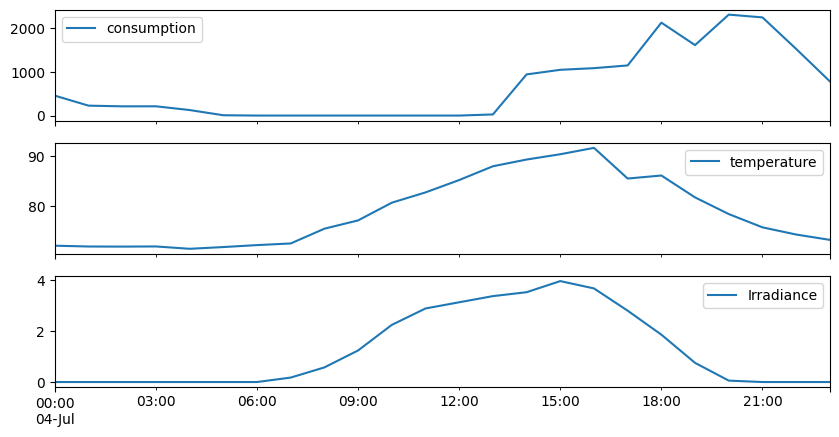

In [45]:
DF_joined_Selected = DF_mod.loc["2014-07-04 00:00:00":"2014-07-04 23:00:00"]
fig,axs = plt.subplots(3,1, figsize = (10,5), dpi=100,sharex=True)
DF_joined_Selected[["consumption"]].plot(ax=axs[0])
axs[0].legend(["consumption"])
DF_joined_Selected[["temperature"]].plot(ax=axs[1])
axs[1].legend(["temperature"])
DF_joined_Selected[["Irradiance"]].plot(ax=axs[2])
axs[2].legend(["Irradiance"])

figName  = "cons VS Irr July_Razmjoo.jpg"
figuresFolderPath="/content/gdrive/MyDrive/EETBS /Figures"
Fig_FilePath = os.path.join(figuresFolderPath,figName)
plt.savefig(Fig_FilePath)


In [46]:
figName  = "consumption VS Irradiance July_Razmjoo.jpg"
Fig_FilePath = os.path.join(DataFolder_Path,figName)
plt.savefig(Fig_FilePath)


<Figure size 432x288 with 0 Axes>

#Week 11 starts

In [47]:
DF_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8670 entries, 2014-01-01 06:00:00 to 2014-12-31 00:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  8670 non-null   float64
 1   temperature  8670 non-null   float64
 2   Irradiance   8670 non-null   float64
dtypes: float64(3)
memory usage: 590.9 KB


In [48]:
DF_mod.describe()

,consumption,temperature,Irradiance
count,8670.000000,8670.000000,8670.000000
mean,345.707233,67.718923,0.975470
std,655.969001,16.255873,1.421280
min,0.000000,20.730000,0.000000
25%,0.000000,56.632500,0.000000
50%,0.000000,70.255000,0.012242
75%,411.575000,79.480000,1.669108
max,2841.000000,101.050000,5.099667


In [49]:
DF_mod["temperature -1h"] = DF_mod["temperature"].shift(1)
DF_mod["temperature -2h"] = DF_mod["temperature"].shift(2)

In [50]:
DF_mod.head(5)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h
2014-01-01 06:00:00,0.0,37.86,0.000000,NaN,NaN
2014-01-01 07:00:00,0.0,38.97,0.052800,37.86,NaN
2014-01-01 08:00:00,0.0,45.85,0.773583,38.97,37.86
2014-01-01 09:00:00,0.0,51.42,2.097700,45.85,38.97
2014-01-01 10:00:00,0.0,57.66,3.036750,51.42,45.85


##Automizing the pre-processing: lagged values

In [53]:
lagStart = 1
lagEnd = 6
lagInterval = 1
columnName = "temperature"
df = DF_mod

In [ ]:
"""
for i in range(lagStart,lagEnd+1,lagInterval):
  newColumnName = columnName + " -" + str(i) + "h"
  df[newColumnName] = df[columnName].shift(i)
  df.dropna(inplace=True) #This apply it to the dataframe: if not, you should use df=df.dropna()
"""

In [61]:
def laggedColumnCreator(df,columnName,lagStart,lagEnd,lagInterval):
  for i in range(lagStart,lagEnd+1,lagInterval):
    newColumnName = columnName + " -" + str(i) + "h"
    df[newColumnName] = df[columnName].shift(i)
    df.dropna(inplace=True)
  return df

In [62]:
DF_mod = laggedColumnCreator(DF_mod,"temperature",1,6,1)
DF_mod.head(3)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h
2014-01-02 03:00:00,0.0,40.63,0.0,45.27,48.82,51.75,53.09,49.05,53.57
2014-01-02 04:00:00,0.0,38.09,0.0,40.63,45.27,48.82,51.75,53.09,49.05
2014-01-02 05:00:00,0.0,36.82,0.0,38.09,40.63,45.27,48.82,51.75,53.09


In [55]:
df.head(5)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h
2014-01-02 04:00:00,0.0,38.09,0.000000,40.63,45.27,48.82,51.75,53.09,49.05
2014-01-02 05:00:00,0.0,36.82,0.000000,38.09,40.63,45.27,48.82,51.75,53.09
2014-01-02 06:00:00,0.0,34.71,0.000000,36.82,38.09,40.63,45.27,48.82,51.75
2014-01-02 07:00:00,0.0,33.90,0.054383,34.71,36.82,38.09,40.63,45.27,48.82
2014-01-02 08:00:00,0.0,35.78,0.601517,33.90,34.71,36.82,38.09,40.63,45.27


#Assignment 11
The first task is using this function! to create the lags of consumption for 24 hours and the lags of radiation between 3 to 6 hours and define new function that receives the time stamp of every line and creates all the time-related features and add them to your dataset (hour, sin(hour), cos(hour), dayOfWeek). it use another function to include the weekendFlag.

So yous should have created another function called weekendFlagCreated that receives the dayOfWeek and return weekend flag (0: weekday, 1:weekend)

And then use the function to add all of the mentioned time-related features.